Steps We Are Going To Follow
1. Data Cleaning
2. EDA
3. Feature Engineering

In [226]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [227]:
df = pd.read_csv("D:\\Datasets\\Google Play Store\\googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [229]:
df.shape

(10841, 13)

In [230]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [231]:
#Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Observations

Dataset has missing values

## Data Cleaning

In [234]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [235]:
df['Reviews'].str.isnumeric().sum()

10840

In [236]:
df.shape

(10841, 13)

In [237]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [238]:
df.drop(10472, inplace=True)

In [239]:
df['Reviews'].str.isnumeric().sum()

10840

# Or the column could be dropped by making a copy

df_copy = df.copy()

df_copy = df_copy.drop(df_copy.index[10472])

df_copy[~df_copy['Reviews'].str.isnumeric()]

In [241]:
df['Reviews'] = df['Reviews'].astype(int)
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int32

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [243]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [244]:
#Converting M and K to numeric
df['Size'] = df['Size'].str.replace('M','000')
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = df['Size'].replace('Varies with device',np.nan)
df['Size'] = df['Size'].str.replace('1,000+','1000')
df['Size'] = df['Size'].astype(float)



In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [246]:
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [247]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [248]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [249]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [250]:
chars_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df[cols] = df[cols].str.replace(item,'')

In [251]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [252]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [253]:
df['Installs'] = df['Installs'].astype(int)


In [254]:
df['Price'] = df['Price'].astype(float)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [256]:
# Last Updated feature
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [257]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [258]:
#Extracting Day,Month and Year
df['Last Updated_Day'] = df['Last Updated'].dt.day
df['Last Updated_Month'] = df['Last Updated'].dt.month
df['Last Updated_Year'] = df['Last Updated'].dt.year

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 10840 non-null  object        
 1   Category            10840 non-null  object        
 2   Rating              9366 non-null   float64       
 3   Reviews             10840 non-null  int32         
 4   Size                9145 non-null   float64       
 5   Installs            10840 non-null  int32         
 6   Type                10839 non-null  object        
 7   Price               10840 non-null  float64       
 8   Content Rating      10840 non-null  object        
 9   Genres              10840 non-null  object        
 10  Last Updated        10840 non-null  datetime64[ns]
 11  Current Ver         10832 non-null  object        
 12  Android Ver         10838 non-null  object        
 13  Last Updated_Day    10840 non-null  int32         


In [260]:
df.drop('Last Updated',axis=1,inplace=True)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10840 non-null  object 
 1   Category            10840 non-null  object 
 2   Rating              9366 non-null   float64
 3   Reviews             10840 non-null  int32  
 4   Size                9145 non-null   float64
 5   Installs            10840 non-null  int32  
 6   Type                10839 non-null  object 
 7   Price               10840 non-null  float64
 8   Content Rating      10840 non-null  object 
 9   Genres              10840 non-null  object 
 10  Current Ver         10832 non-null  object 
 11  Android Ver         10838 non-null  object 
 12  Last Updated_Day    10840 non-null  int32  
 13  Last Updated_Month  10840 non-null  int32  
 14  Last Updated_Year   10840 non-null  int32  
dtypes: float64(3), int32(5), object(7)
memory usage: 1.1+ MB


In [295]:
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

In [308]:
# Save the cleaned dataset now and then
df.to_csv('data/google_cleaned.csv') 
# This saves the cleaned dataset in the CWD in the already created folder name 'data'

OSError: Cannot save file into a non-existent directory: 'data'

In [310]:
import os

cwd = os.getcwd()
print(cwd)

C:\Users\hagne


In [316]:
os.chdir("D:\\Datasets\\Google Play Store") 
print(os.getcwd()) 

D:\Datasets\Google Play Store


In [320]:
df.to_csv('data/google_cleaned.csv') 

# EDA

In [324]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated_Day,Last Updated_Month,Last Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [328]:
df.duplicated('App')

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10840, dtype: bool

In [330]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated_Day,Last Updated_Month,Last Updated_Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,3.9,4.4 and up,30,7,2018


In [332]:
df[df.duplicated('App')].shape

(1181, 15)

### Dataset has duplicate records

In [335]:
df.drop_duplicates(subset=['App'],keep='first',inplace=True)

In [337]:
df.shape

(9659, 15)

In [343]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features : {}'.format(len(cat_features),cat_features))

We have 8 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated_Day', 'Last Updated_Month', 'Last Updated_Year']
We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


### Feature Information

App Category: Category of the app. This could be beauty, business, entertainment, education...etc.

Rating: How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

Reviews: The number of user reviews each app has received.

Size: The memory size needed to install the application.

Installs: The number of times each application has been installed by users.

Type: Whether the app is free or a paid app.

Price: The price of the app.

Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

Last Updated: Release date of the most recent update for the app.

Current Ver: The app's current version.

Android Ver: The oldest version of Android OS supported by the app.

In [346]:
# Proportion of count data on categorical columns
for col in cat_features:
    print(df[col].value_counts(normalize=True)*100)
    print('----------------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
----------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3

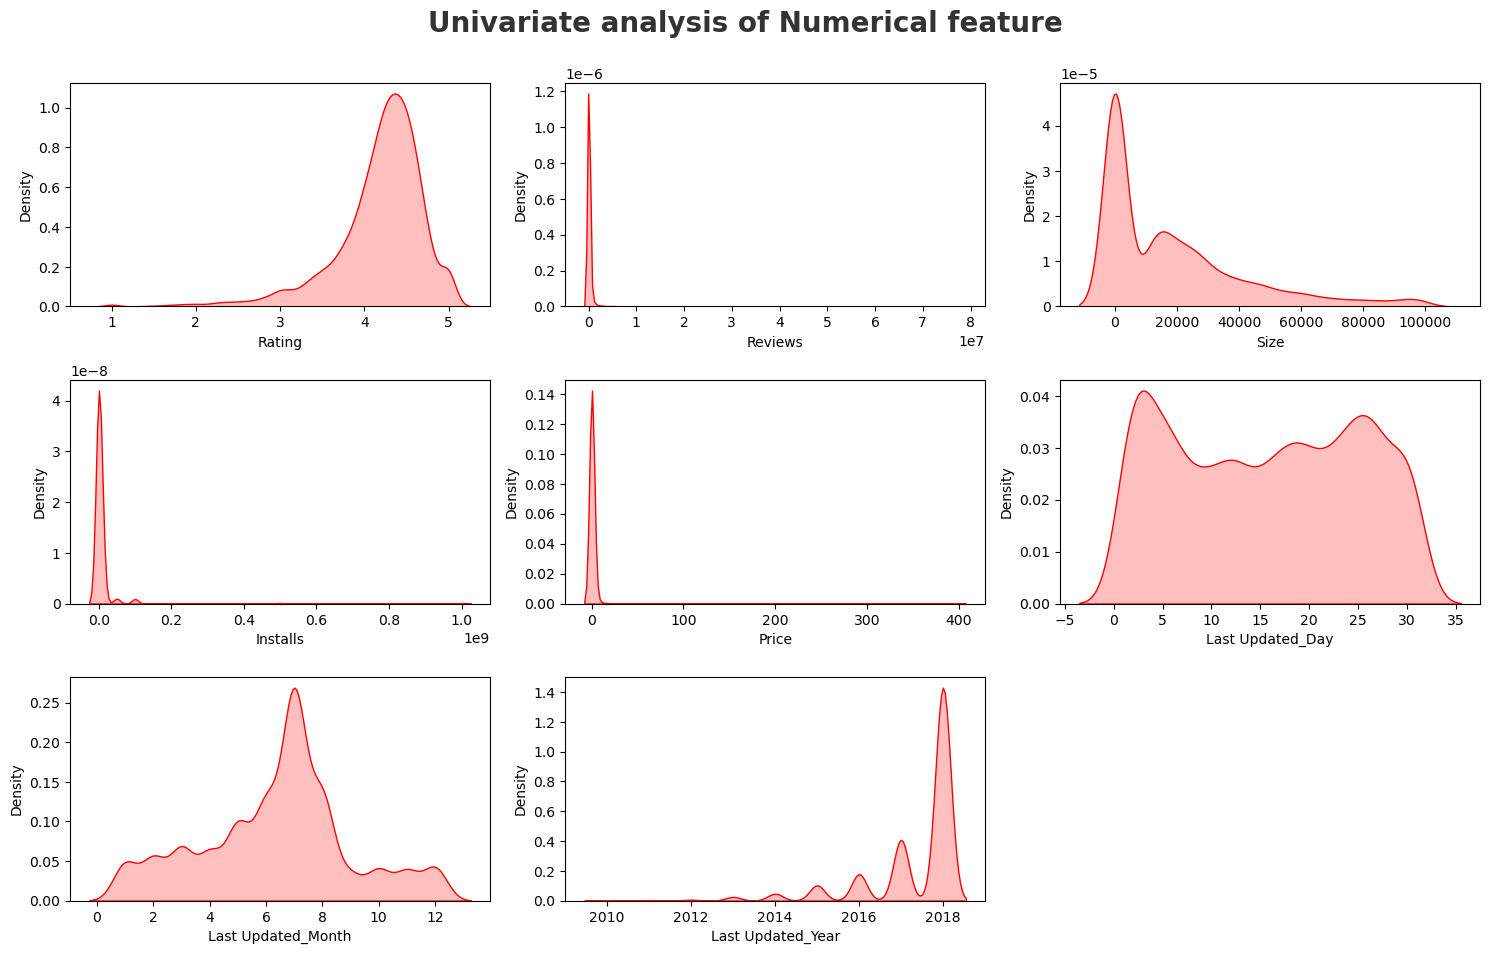

In [353]:
# Numerical columns - visualisation
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of Numerical feature', fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range (0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color ='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#Observations

Rating and Year is left skewed while Reviews, Size, Installs and Price are right skewed.
    
Since right skewed, outliers must be obviously present


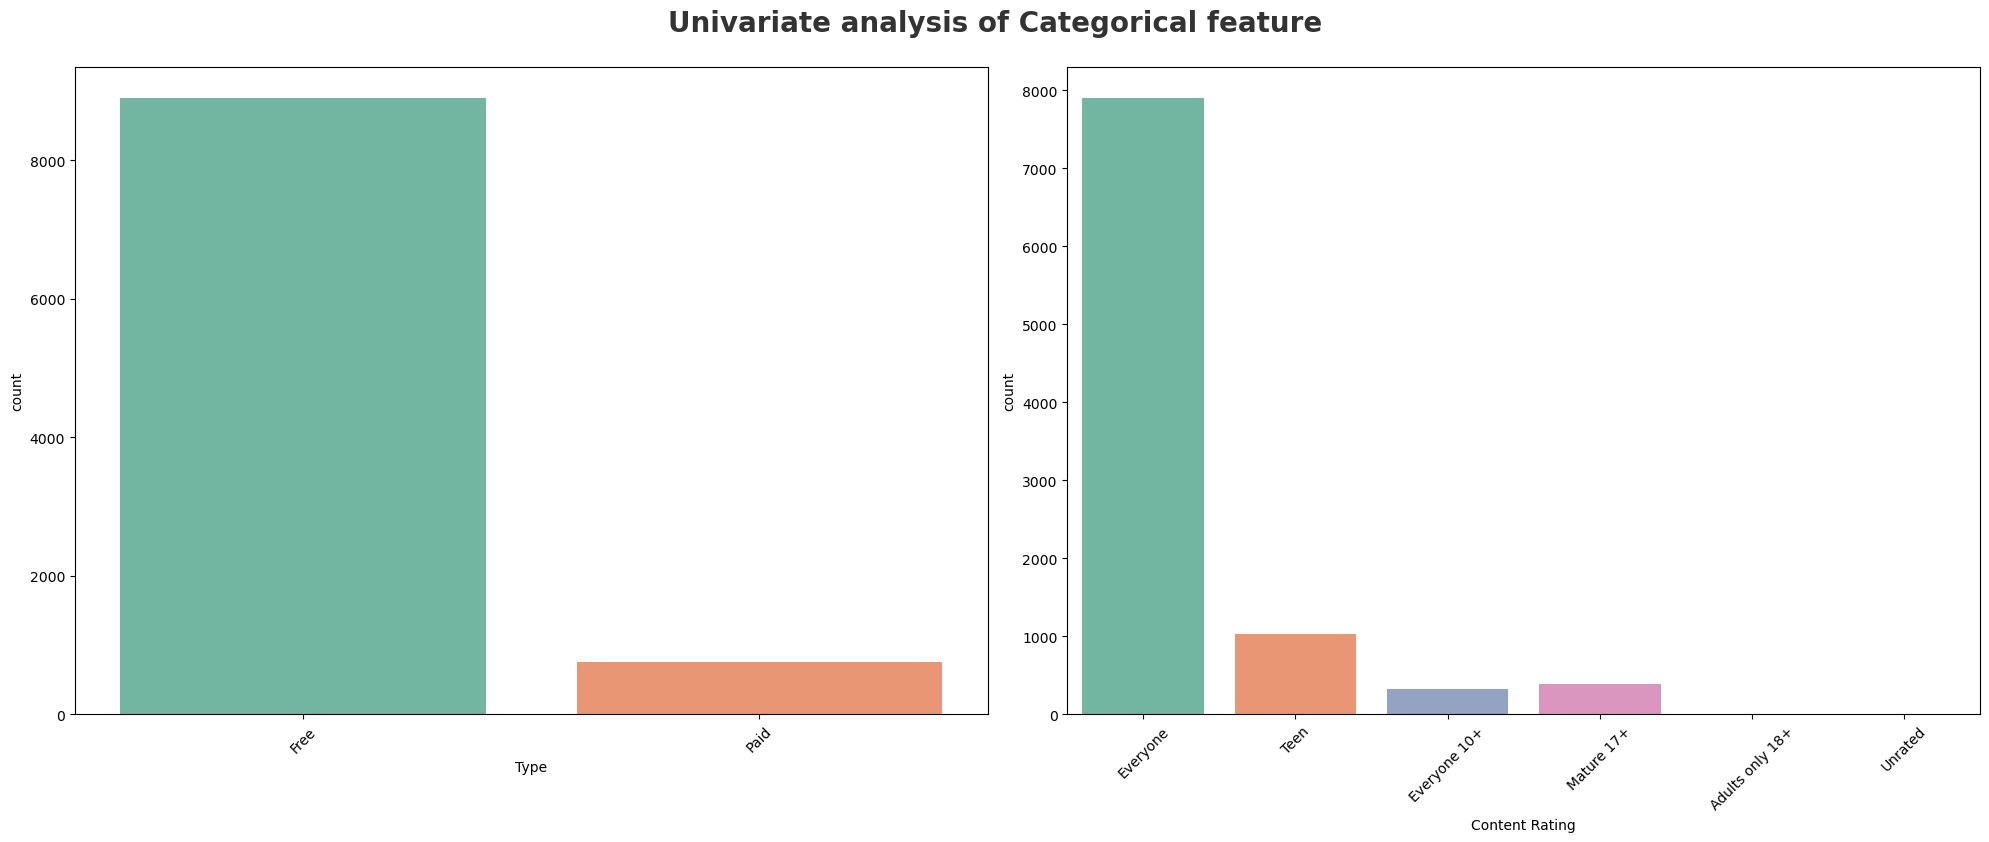

In [355]:
# Categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('Univariate analysis of Categorical feature', fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category = ['Type', 'Content Rating']

for i in range (0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]], palette = 'Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Which is the most popular app category?


In [358]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated_Day,Last Updated_Month,Last Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='count'>

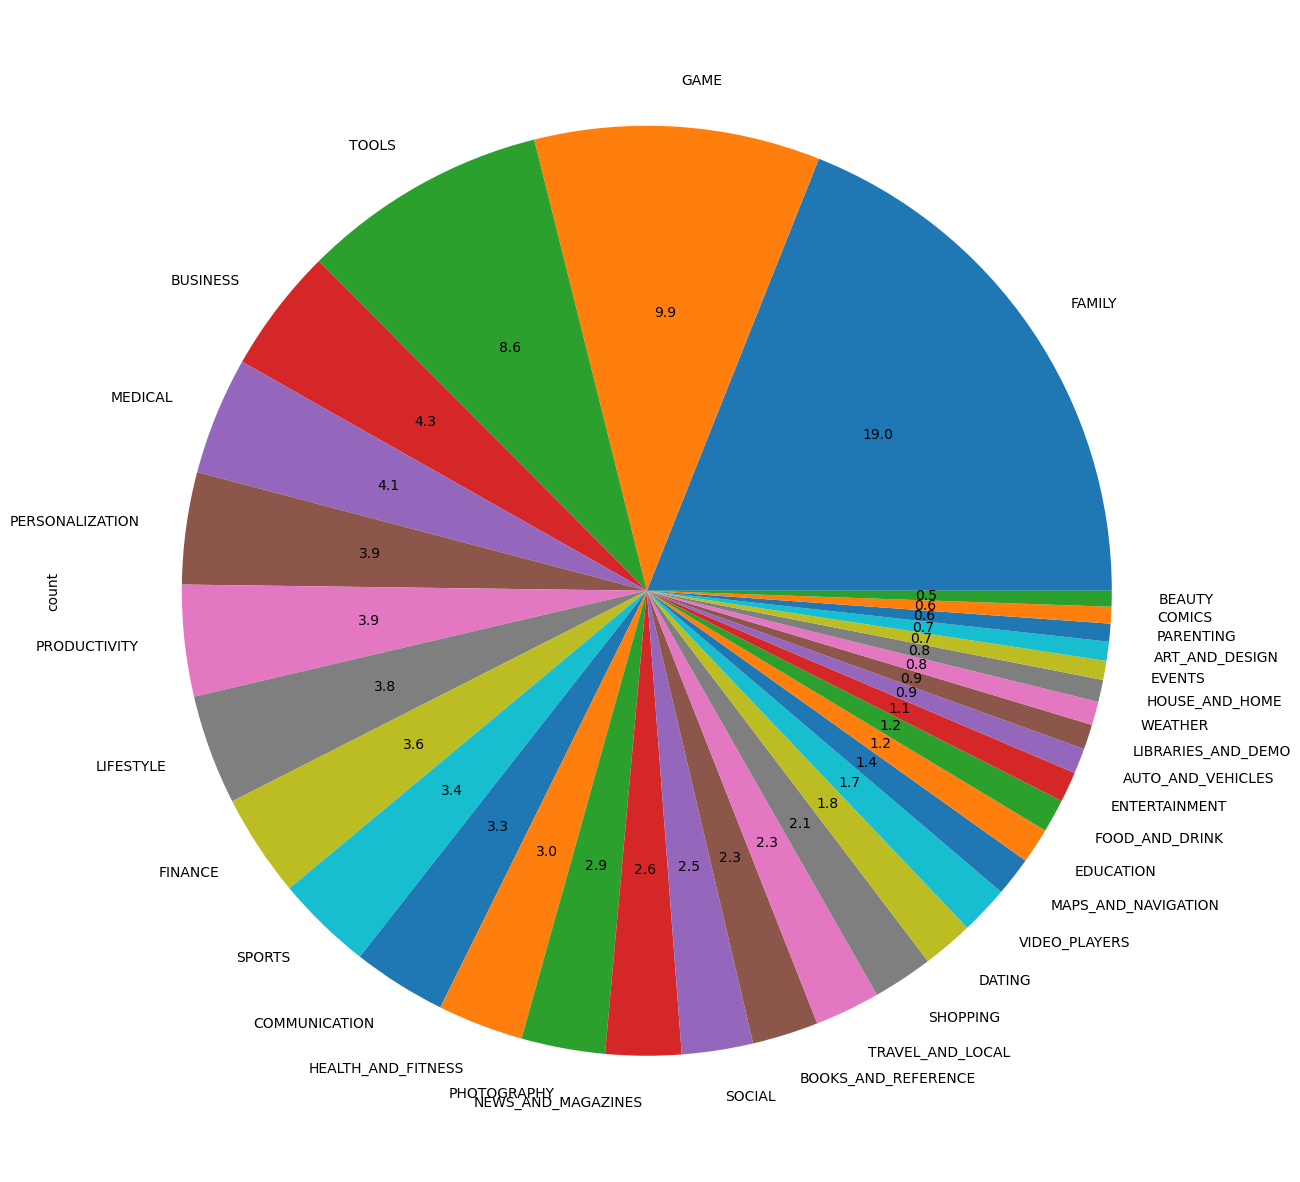

In [364]:
df['Category'].value_counts().plot.pie(y = df['Category'],figsize=(15,16),autopct='%1.1f')

## Observation

1. More apps under category of family, games & tools

2. Beauty, comics, arts and weather kind of apps are very less in playstore

In [373]:
# Top 10 App Categories
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns = {'Category': 'Count'},inplace = True)
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


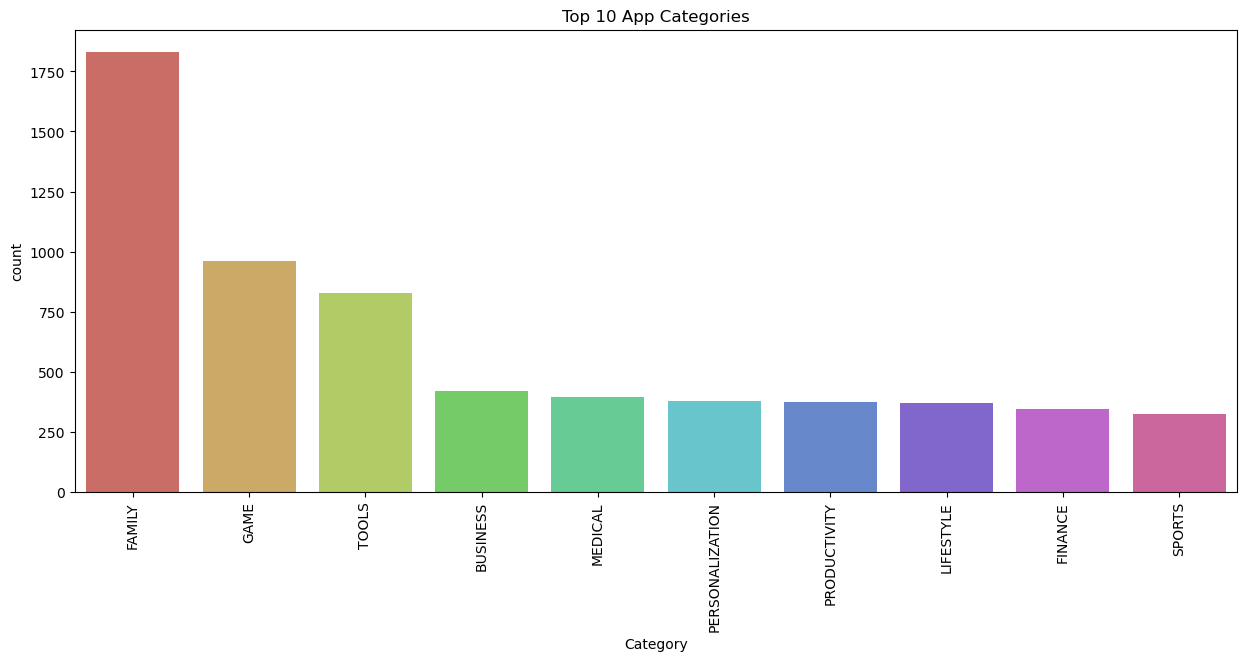

In [381]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y='count', data = category[:10],palette = 'hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation = 90)
plt.show()

## Insights

1. Family category tops with 18% followed by Games category with 11%

2. Beauty category comes last with 1%